# Taller Pronósticos de energia 
Profesores: Andres Julian Aristizabal y Jorge Romero

<img src="https://www.utadeo.edu.co/sites/tadeo/files/multimedia/images/gallery/web_paneles_solares_cipi_20150203_008.jpg" alt="" width="30%" height="20%">


<img src="https://media0.giphy.com/media/l2SqeBclNUChzPhAc/source.gif" alt="" width="30%" height="20%">

*   Son necesarios para planeación a futuro.
*   Casi siempre se equivocan.
*   Debemos calcular su nivel de error.

<img src="https://media4.giphy.com/media/VoksFyW6IYFUI/giphy.gif?cid=ecf05e47xfv2lrrba2qht6oi70749utbb6my68oquvjeb5iy&rid=giphy.gif" alt="" width="10%" height="10%">

## Comencemos con un conjunto de energia generada en nuestro CIPI:

https://drive.google.com/file/d/1HduTQuz_fzCNKX2tJ2zq7HEe1t2oQDih/view?usp=sharing

Probemos importar desde internet los históricos de 2019:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
URL = 'https://drive.google.com/file/d/1HduTQuz_fzCNKX2tJ2zq7HEe1t2oQDih/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path,header=None)
df = df.rename(columns = {0: 'ds', 1: 'ts'})
df.head()
``` 
## Copie a continuacion:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
URL = 'https://drive.google.com/file/d/1HduTQuz_fzCNKX2tJ2zq7HEe1t2oQDih/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path,header=None)
df = df.rename(columns = {0: 'ds', 1: 'ts'})
df.head()

,ds,ts
0,2019-01-01,625.839631
1,2019-01-02,622.590407
2,2019-01-03,626.938902
3,2019-01-04,620.755140
4,2019-01-05,624.126452


Ahora Grafiquemos la generacion de energia:

```python
# Imprime la serie de tiempo
f, ax = plt.subplots(1,1)
ax.plot(df['ts'])

# Agrega titulo
ax.set_title('Energia 1 año KWh')

# Etiquetas ejes
ax.tick_params(axis = 'x', rotation = 45)
plt.xlabel('dias')
plt.ylabel('KWh')
# Muestra grafica
plt.show()
plt.close()
```

Pruebe debajo!!!:

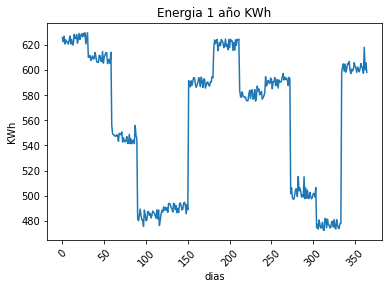

In [ ]:
# Imprime la serie de tiempo
f, ax = plt.subplots(1,1)
ax.plot(df['ts'])
 
# Agrega titulo
ax.set_title('Energia 1 año KWh')
 
# Etiquetas ejes
ax.tick_params(axis = 'x', rotation = 45)
plt.xlabel('dias')
plt.ylabel('KWh')
# Muestra grafica
plt.show()
plt.close()

___________________________________

# Pronosticos con FB- Prophet

Prophet es un procedimiento para pronosticar datos de series temporales basados en un modelo aditivo en el que las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, más los efectos de vacaciones. Funciona mejor con series de tiempo que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es robusto ante los datos faltantes y los cambios en la tendencia, y generalmente maneja bien los valores atípicos.

## **Paso 1:** Funcion para calcular el tiempo
```python
from fbprophet import Prophet
import datetime
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

```
_______________________________________



In [ ]:
from fbprophet import Prophet
import datetime
from datetime import datetime
 
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

## **Paso 2:** Agregar condiciones
```python
date_column = 'dt'
metric_column = 'ts'
table = df_example
start_training_date = '2019-01-01'
end_training_date = '2019-06-15'
start_forecasting_date = '2019-06-16'
end_forecasting_date = '2019-12-31'
year_to_estimate = '2019'
future_num_points = days_between(start_forecasting_date, end_forecasting_date)
cap = None 
growth = 'linear'
n_changepoints = 25 
changepoint_prior_scale = 0.05 
changepoints = None 
holidays_prior_scale = 10 
interval_width = 0.8 
mcmc_samples = 0
holidays = None
daily_seasonality = True
yearly_seasonality = True

  ```
_________________________________

In [ ]:
date_column = 'dt'
metric_column = 'ts'
start_training_date = '2019-01-01'
end_training_date = '2019-06-15'
start_forecasting_date = '2019-06-16'
end_forecasting_date = '2019-12-31'
year_to_estimate = '2019'
future_num_points = days_between(start_forecasting_date, end_forecasting_date)
cap = None 
growth = 'linear'
n_changepoints = 25 
changepoint_prior_scale = 0.05 
changepoints = None 
holidays_prior_scale = 10 
interval_width = 0.8 
mcmc_samples = 0
holidays = None
daily_seasonality = True
yearly_seasonality = True

## **Paso 3:** Crear funcion de pronostico
```python
URL = 'https://drive.google.com/file/d/1HduTQuz_fzCNKX2tJ2zq7HEe1t2oQDih/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path,header=None)
df = df.rename(columns = {0: 'ds', 1: 'y'})
df_prophet=df
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True,
                          yearly_seasonality = True):
  """
  Crear el pronostico
  """
  df_ = df.copy()
  m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality,
              yearly_seasonality= yearly_seasonality)
  m.fit(df_)
  future = m.make_future_dataframe(periods = future_num_points)
  fcst = m.predict(future)
  m.plot(fcst);
  m.plot_components(fcst)

  return fcst
  ```
  _____________________________________

In [ ]:
URL = 'https://drive.google.com/file/d/1HduTQuz_fzCNKX2tJ2zq7HEe1t2oQDih/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path,header=None)
df = df.rename(columns = {0: 'ds', 1: 'y'})
df_prophet=df
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True,
                          yearly_seasonality = True):
  """
  Crear el pronostico
  """
  df_ = df.copy()
  m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality,
              yearly_seasonality= yearly_seasonality)
  m.fit(df_)
  future = m.make_future_dataframe(periods = future_num_points)
  fcst = m.predict(future)
  m.plot(fcst);
  m.plot_components(fcst)
 
  return fcst

## Paso 4 Correr el pronostico
```python
fcst = create_daily_forecast(df_prophet,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality,
                             yearly_seasonality)
```
______________________________

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


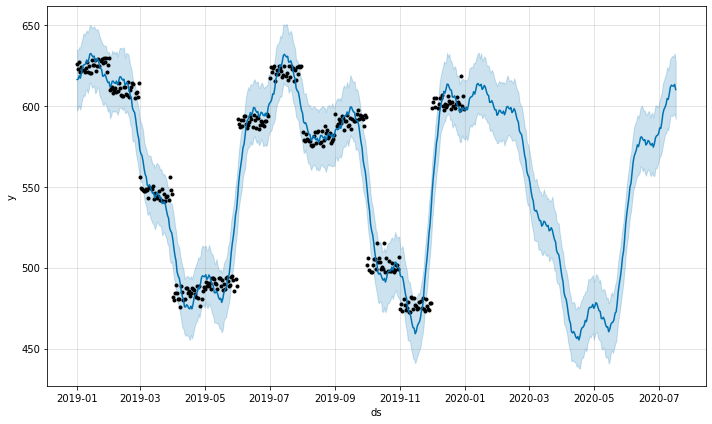

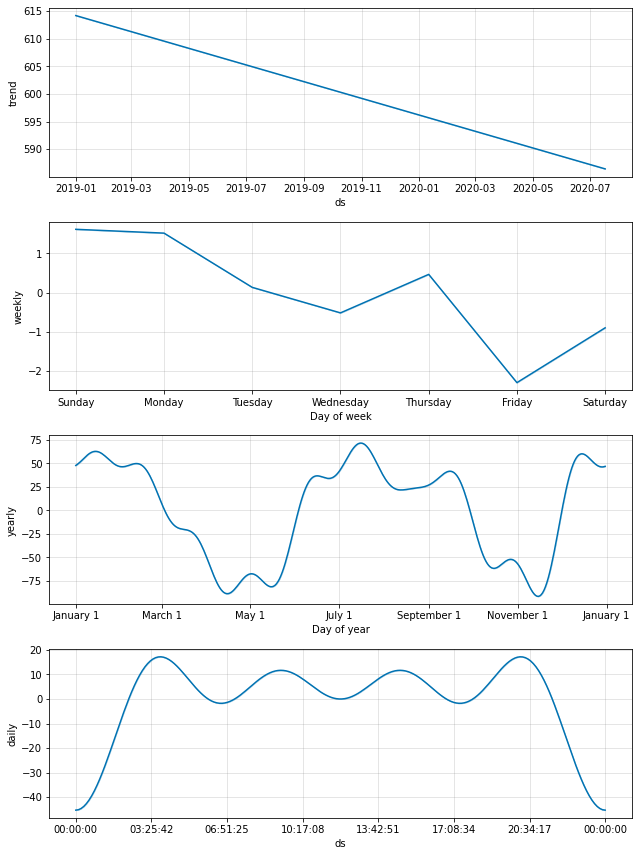

In [ ]:
fcst = create_daily_forecast(df_prophet,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality,
                             yearly_seasonality)

## Finalmente calculemos el error estadistico:
```python
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return
    
    print_error_metrics(y_true = df_prophet['y'], y_pred = fcst['yhat'])
```

In [ ]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100
 
def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100
 
def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))
 
def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return
 
  

In [ ]:
  print_error_metrics(y_true = df_prophet['y'], y_pred = fcst['yhat'])

MAPE: 1.825244
MPE: -0.068733
MAE: 995.079299
RMSE: 14.232071
